In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


yf.pdr_override()

In [3]:

sectors =["consumer defensive","consumer goods","financials","healthcare","industrials","basic materials","telecommunication","real estate"] #Create labels for dataframes
consumer_defensive=["SZU.DE","B4B3.DE"]
consumer_goods=["BOSS.DE","HLE.DE","PUM.DE","ZAL.DE","SHA.DE","CEC.DE"] 
financials=["TLX.DE","HNR1.DE","ARL.DE","PBB.DE"]
healthcare=["FIE.DE","EVT.DE","GXI.DE"] 
industrials=["MTX.DE","NDA.DE","RHM.DE","DUE.DE","FRA.DE","NOEJ.DE","KGX.DE","JUN3.DE","G1A.DE","AIR.DE","HOT.DE","LEO.DE","KRN.DE"] 
basic_materials=["WCH.DE","BNR.DE","LXS.DE","EVK.DE","SDF.DE","FPE3.DE","SZG.DE","SY1.DE","1COV.DE"] #
telecommunication=["SAX.DE","RRTL.DE"] 
real_estate=["TEG.DE","DEQ.DE","G24.DE","DWNI.DE","LEG.DE","GYC.DE"]


In [4]:
#yy-mm-dd
start_test_quarter='2017-09-19'
end_test_quarter='2017-12-19'
start_test_semester='2017-09-19'
end_test_semester='2018-03-19'
start_test='2017-09-19' 
end_test='2018-09-19'

In [5]:
start_date='2010-09-18'
end_date='2017-09-18'


In [6]:
#Method for creating an array of sector returns, accounting for stocks not being present
def create_sector_returns(sector):
  data=pdr.get_data_yahoo(sector,start_date, end_date, progress=False )['Adj Close'] 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.fillna(0)
  sector_ret=[] 
  for x in range(len(mra)):
    returns_data = len(mra.iloc[x,:].dropna())  #use the dropna, then calculate how many columns are left for every row. Do this so that the 0's don't pull down the average by dividing by the length of the total stocks, only dividing by those with non 0 values
    if returns_data == 0: #avoid dividing by 0
      returns_data = 1
    sector_ret.append(np.sum(mra.iloc[x,:])/returns_data)
  sec_ret=np.array(sector_ret) 
  return sec_ret

In [7]:
#Create an array with the sector returns of a given day in the same row for all sectors
all_sectors_ret= np.column_stack((create_sector_returns(consumer_defensive),create_sector_returns(consumer_goods),create_sector_returns(financials),create_sector_returns(healthcare),create_sector_returns(industrials),create_sector_returns(basic_materials),create_sector_returns(telecommunication),create_sector_returns(real_estate)))


In [8]:
ret_df=pd.DataFrame(all_sectors_ret, columns=sectors)
cov=np.cov(all_sectors_ret.T)
corr=ret_df.corr()
cov1=ret_df.cov()
corr1=np.corrcoef(all_sectors_ret.T)
corr_df=pd.DataFrame(corr1,index=sectors,columns=sectors)
corr_df

,consumer defensive,consumer goods,financials,healthcare,industrials,basic materials,telecommunication,real estate
consumer defensive,1.000000,0.274802,0.239919,0.251089,0.285394,0.264211,0.148726,0.241637
consumer goods,0.274802,1.000000,0.648307,0.547640,0.711862,0.700751,0.407580,0.546966
financials,0.239919,0.648307,1.000000,0.559947,0.763219,0.723593,0.396616,0.513022
healthcare,0.251089,0.547640,0.559947,1.000000,0.662611,0.622946,0.333091,0.499020
industrials,0.285394,0.711862,0.763219,0.662611,1.000000,0.842152,0.430880,0.579701
basic materials,0.264211,0.700751,0.723593,0.622946,0.842152,1.000000,0.396595,0.546024
telecommunication,0.148726,0.407580,0.396616,0.333091,0.430880,0.396595,1.000000,0.380720
real estate,0.241637,0.546966,0.513022,0.499020,0.579701,0.546024,0.380720,1.000000


In [98]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA



# Perform PCA
pca = PCA(n_components=5)
pca_fit=pca.fit(ret_df)
returns_pca = pca.fit_transform(ret_df)
pcs=["Principal Component 1","Principal Component 2","Principal Component 3","Principal Component 4","Principal Component 5","Principal Component 6","Principal Component 7","Principal Component 8"] #Labeled for Dataframes

nr_comps=pca_fit.n_components_ #set it so that the code can be run for different nr of PC
# Extract the first n principal components
principal_components = pca.components_

# Project the returns data onto the first n principal components, in this case 5
returns_projected = np.dot(ret_df, principal_components.T)
cov_projected=np.cov(returns_projected.T)

#Create a dataframe for the projected returns
ret_proj_df=pd.DataFrame(returns_projected,columns=pcs[:nr_comps])
corr_proj=ret_proj_df.corr()

In [99]:
corr_proj

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
Principal Component 1,1.000000e+00,-2.351964e-16,-4.600853e-16,-5.646526e-17,2.139600e-16
Principal Component 2,-2.351964e-16,1.000000e+00,-1.849520e-16,1.692942e-16,-1.093675e-15
Principal Component 3,-4.600853e-16,-1.849520e-16,1.000000e+00,1.139974e-16,-3.893179e-16
Principal Component 4,-5.646526e-17,1.692942e-16,1.139974e-16,1.000000e+00,5.193742e-16
Principal Component 5,2.139600e-16,-1.093675e-15,-3.893179e-16,5.193742e-16,1.000000e+00


In [10]:
import itertools

def portfolio_weights(num_assets, increment=0.05):
    for weights in itertools.product(range(-int(1/increment)+1, int(1/increment)+1), repeat=num_assets):
        if sum(weights) == int(1/increment):
            yield [w * increment for w in weights]
num_assets = nr_comps
weights_list = []
weight_generator = portfolio_weights(num_assets)

for i, weights in enumerate(weight_generator): 
  
    weights_list.append([round(w, 2) for w in weights]) # Round to 2 decimal points because incrememnts are 0,05. To avoid numbers such as 0.7000000001 being stored
#Turn the list into an array
weights_array = np.array(weights_list)

In [12]:
np.random.seed(42)

ret_arr = np.zeros(len(weights_array))
vol_arr = np.zeros(len(weights_array))
sharpe_arr = np.zeros(len(weights_array))
  
all_weights = np.zeros((len(weights_array), len(sectors))) #replaced len(sectors) with nr_comps
for x in range(len(weights_array)):
         # Expected return
    ret_arr[x] = np.sum( (ret_proj_df.mean() * weights_array[x] * 254)) 
     # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights_array[x], np.dot(cov_projected*254, weights_array[x])))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
#Normally it is multiplied by 252 for the average amount of trading days in the american markets. The german markets are open for 254 days on average

In [13]:
sharpe_max= sharpe_arr.argmax()
max_ret_sr= ret_arr[sharpe_max]
max_vol_sr= vol_arr[sharpe_max]
max_sharpe_sr= sharpe_arr[sharpe_max]

minvol=vol_arr.argmin()
minvol_ret_nr= ret_arr[minvol]
minvol_vol_nr=vol_arr[minvol]
minvol_sharpe=sharpe_arr[minvol]

maxret=ret_arr.argmax()
maxret_ret=ret_arr[maxret]
maxret_vol=vol_arr[maxret]
maxret_sharpe=sharpe_arr[maxret]


minvol_weights= weights_array[minvol]
maxsharpe_weights= weights_array[sharpe_max]
maxret_weights= weights_array[maxret]



In [14]:
minvol_df=pd.DataFrame([minvol_weights], columns=pcs[:nr_comps])
maxret_df=pd.DataFrame([maxret_weights],columns=pcs[:nr_comps])
maxsharpe_df=pd.DataFrame([maxsharpe_weights],columns=pcs[:nr_comps])

In [15]:
minvol_df = minvol_df.loc[:, (minvol_df != 0).any(axis=0)]
maxsharpe_df = maxsharpe_df.loc[:, (maxsharpe_df != 0).any(axis=0)]
maxret_df = maxret_df.loc[:, (maxret_df != 0).any(axis=0)]


In [16]:
weights = principal_components[0] / sum(abs(principal_components[0]))

portfolio_weights_minvol = np.dot(minvol_weights,principal_components)
portfolio_weights_maxret = np.dot(maxret_weights,principal_components)
portfolio_weights_maxsharpe = np.dot(maxsharpe_weights,principal_components)


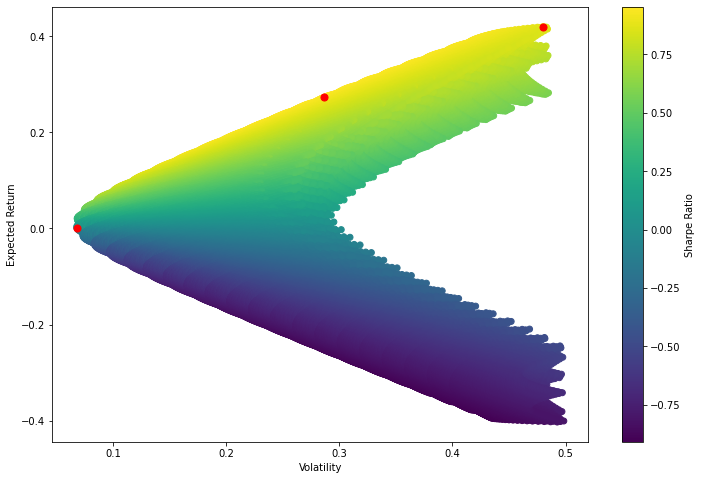

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.scatter(max_vol_sr, max_ret_sr,c='red', s=50,) # red dot
plt.scatter(minvol_vol_nr,minvol_ret_nr,c='red',s=50)
plt.scatter(maxret_vol,maxret_ret,c='red',s=50)
plt.show()

In [18]:
loadings = principal_components[:nr_comps,:]
pw_maxsharpe = np.dot(maxsharpe_weights, loadings)
pw_maxret= np.dot(maxret_weights, loadings)
pw_minvol=np.dot(minvol_weights, loadings)

pw_maxret_df=pd.DataFrame(pw_maxret,index=sectors,columns=["weights"])
pw_maxsharpe_df=pd.DataFrame(pw_maxsharpe,index=sectors,columns=["weights"])
pw_minvol_df=pd.DataFrame(pw_minvol,index=sectors,columns=["weights"])





In [66]:
def create_sector_returns(sector):
  data=pdr.get_data_yahoo(sector,start_test, end_test, progress=False )['Adj Close'] #.resample('M').ffill() 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.fillna(0)
  sector_ret=[] 
  for x in range(len(mra)):
    returns_data = len(mra.iloc[x,:].dropna())  #use the dropna, then calculate how many columns are left for every row. Do this so that the 0's don't pull down the average by dividing by the length of the total stocks, only dividing by those with non 0 values
    if returns_data == 0: #avoid dividing by 0
      returns_data = 1
    sector_ret.append(np.sum(mra.iloc[x,:])/returns_data)
  sec_ret=np.array(sector_ret) 
  return sec_ret

In [67]:
post_opt_sectors_ret= np.column_stack((create_sector_returns(consumer_defensive),create_sector_returns(consumer_goods),create_sector_returns(financials),create_sector_returns(healthcare),create_sector_returns(industrials),create_sector_returns(basic_materials),create_sector_returns(telecommunication),create_sector_returns(real_estate)))
post_sectors_df=pd.DataFrame(post_opt_sectors_ret,columns=sectors)

In [68]:
#https://www.sea-stat.com/wp-content/uploads/2021/05/Yves-Hilpisch-Python-for-Finance_-Mastering-Data-Driven-Finance-Book-OReilly-2018.pdf
pw_maxsharpe_norm= pw_maxsharpe/np.sum(pw_maxsharpe)
pw_maxsharpe_norm_df=pd.DataFrame(pw_maxsharpe_norm,index=sectors,columns=["weights"])
pw_maxret_norm= pw_maxret/np.sum(pw_maxret)
pw_maxret_norm_df=pd.DataFrame(pw_maxret_norm,index=sectors,columns=["weights"])
pw_minvol_norm= pw_minvol/np.sum(pw_minvol)
pw_minvol_norm_df=pd.DataFrame(pw_minvol_norm,index=sectors,columns=["weights"])


In [69]:
back_tested_maxret=pw_maxret_norm*post_sectors_df.mean()*254
back_tested_minvol=pw_minvol_norm*post_sectors_df.mean()*254
back_tested_maxsharpe=pw_maxsharpe_norm*post_sectors_df.mean()*254


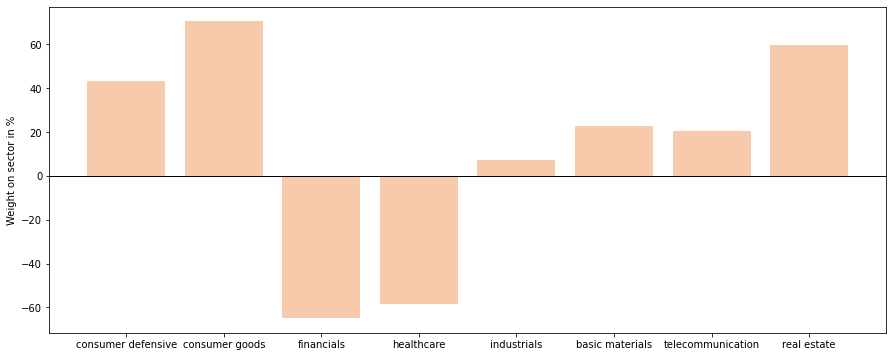

In [70]:
#https://stackoverflow.com/questions/67012717/how-to-plot-a-line-in-zero-value-in-a-graphic-bar
#https://www.python-graph-gallery.com/3-control-color-of-barplots

plt.figure(figsize=(15,6))
plt.bar(sectors, pw_minvol_norm*100,color=['#F7CAAC'])
plt.ylabel('Weight on sector in %') 
plt.axhline(y=0,linewidth=1, color='k')
plt.show()

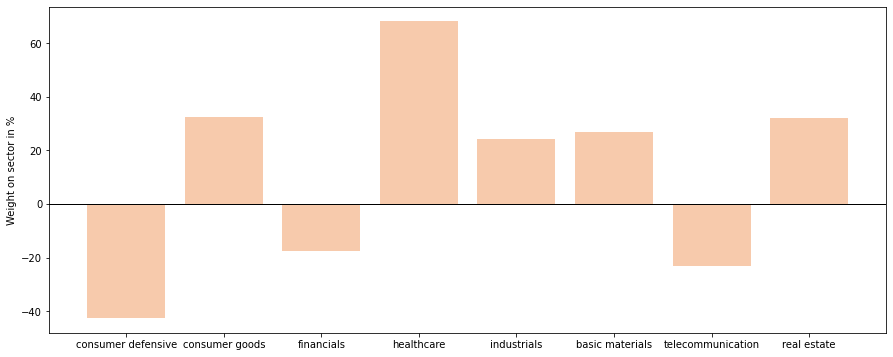

In [71]:
plt.figure(figsize=(15,6))
plt.bar(sectors, pw_maxret_norm*100,color=['#F7CAAC'])
plt.ylabel('Weight on sector in %')
plt.axhline(y=0,linewidth=1, color='k')
plt.show()

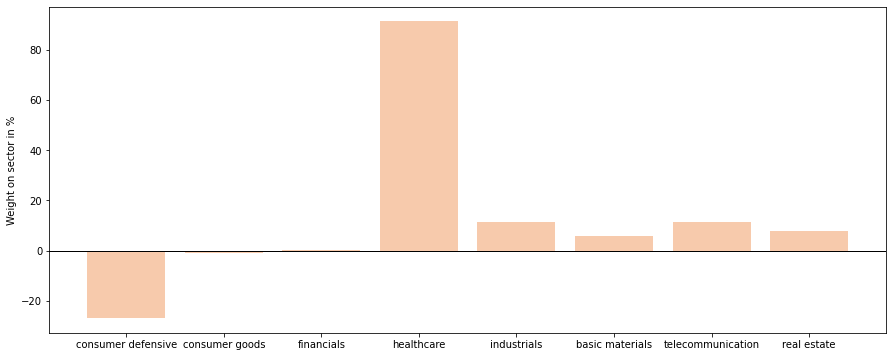

In [72]:
plt.figure(figsize=(15,6))
plt.bar(sectors, pw_maxsharpe_norm*100,color=['#F7CAAC'])
plt.ylabel('Weight on sector in %')
plt.axhline(y=0,linewidth=1, color='k')
plt.show()

In [73]:
list_of_rets_annual=[]
list_of_rets_annual.append(back_tested_minvol.sum()*100)
list_of_rets_annual.append(back_tested_maxsharpe.sum()*100)
list_of_rets_annual.append(back_tested_maxret.sum()*100)

list_of_rets_annual

[-11.953054727908622, 10.129901579691236, 16.467975903695987]

In [74]:
minvol_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,0.05,0.1,0.2,0.2,0.45


In [75]:
maxsharpe_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,-0.6,0.15,0.4,1.0,0.05


In [76]:
maxret_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,-0.95,0.9,1.0,1.0,-0.95


In [77]:
pw_maxret_norm_df

,weights
consumer defensive,-0.425386
consumer goods,0.323959
financials,-0.175765
healthcare,0.680157
industrials,0.243739
basic materials,0.266768
telecommunication,-0.233362
real estate,0.319891


In [78]:
pw_maxsharpe_norm_df

,weights
consumer defensive,-0.268751
consumer goods,-0.011140
financials,0.003578
healthcare,0.912410
industrials,0.112344
basic materials,0.057216
telecommunication,0.115260
real estate,0.079083


In [79]:
pw_minvol_norm_df

,weights
consumer defensive,0.431215
consumer goods,0.704411
financials,-0.648081
healthcare,-0.585768
industrials,0.071811
basic materials,0.228104
telecommunication,0.202948
real estate,0.595361


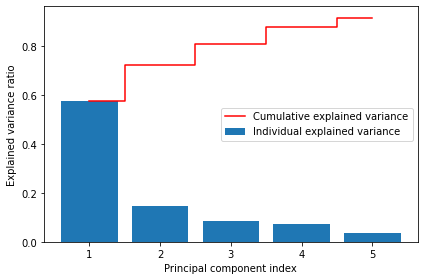

In [94]:
exp_var_pca = pca.explained_variance_ratio_


cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(1,6), exp_var_pca, alpha=1, align='center', label='Individual explained variance')
plt.step(range(1,6), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance',c='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [34]:
def create_sector_returns(sector):
  data=pdr.get_data_yahoo(sector,start_test_quarter, end_test_quarter, progress=False )['Adj Close'] #.resample('M').ffill() 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.fillna(0)
  sector_ret=[] 
  for x in range(len(mra)):
    returns_data = len(mra.iloc[x,:].dropna())  #use the dropna, then calculate how many columns are left for every row. Do this so that the 0's don't pull down the average by dividing by the length of the total stocks, only dividing by those with non 0 values
    if returns_data == 0: #avoid dividing by 0
      returns_data = 1
    sector_ret.append(np.sum(mra.iloc[x,:])/returns_data)
  sec_ret=np.array(sector_ret) 
  return sec_ret

In [35]:
post_opt_sectors_ret= np.column_stack((create_sector_returns(consumer_defensive),create_sector_returns(consumer_goods),create_sector_returns(financials),create_sector_returns(healthcare),create_sector_returns(industrials),create_sector_returns(basic_materials),create_sector_returns(telecommunication),create_sector_returns(real_estate)))
post_sectors_df=pd.DataFrame(post_opt_sectors_ret,columns=sectors)

In [36]:
pw_maxsharpe_norm= pw_maxsharpe/np.sum(pw_maxsharpe)
pw_maxsharpe_norm_df=pd.DataFrame(pw_maxsharpe_norm,index=sectors,columns=["weights"])
pw_maxret_norm= pw_maxret/np.sum(pw_maxret)
pw_maxret_norm_df=pd.DataFrame(pw_maxret_norm,index=sectors,columns=["weights"])
pw_minvol_norm= pw_minvol/np.sum(pw_minvol)
pw_minvol_norm_df=pd.DataFrame(pw_minvol_norm,index=sectors,columns=["weights"])


In [37]:
back_tested_maxret=pw_maxret_norm*post_sectors_df.mean()*64
back_tested_minvol=pw_minvol_norm*post_sectors_df.mean()*64
back_tested_maxsharpe=pw_maxsharpe_norm*post_sectors_df.mean()*64


In [95]:
list_of_rets_quarter=[]
list_of_rets_quarter.append(back_tested_minvol.sum()*100)
list_of_rets_quarter.append(back_tested_maxsharpe.sum()*100)
list_of_rets_quarter.append(back_tested_maxret.sum()*100)


In [39]:
def create_sector_returns(sector):
  data=pdr.get_data_yahoo(sector,start_test_semester, end_test_semester, progress=False )['Adj Close'] #.resample('M').ffill() 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.fillna(0)
  sector_ret=[] 
  for x in range(len(mra)):
    returns_data = len(mra.iloc[x,:].dropna())  #use the dropna, then calculate how many columns are left for every row. Do this so that the 0's don't pull down the average by dividing by the length of the total stocks, only dividing by those with non 0 values
    if returns_data == 0: #avoid dividing by 0
      returns_data = 1
    sector_ret.append(np.sum(mra.iloc[x,:])/returns_data)
  sec_ret=np.array(sector_ret) 
  return sec_ret

In [40]:
post_opt_sectors_ret= np.column_stack((create_sector_returns(consumer_defensive),create_sector_returns(consumer_goods),create_sector_returns(financials),create_sector_returns(healthcare),create_sector_returns(industrials),create_sector_returns(basic_materials),create_sector_returns(telecommunication),create_sector_returns(real_estate)))
post_sectors_df=pd.DataFrame(post_opt_sectors_ret,columns=sectors)

In [41]:
pw_maxsharpe_norm= pw_maxsharpe/np.sum(pw_maxsharpe)
pw_maxsharpe_norm_df=pd.DataFrame(pw_maxsharpe_norm,index=sectors,columns=["weights"])
pw_maxret_norm= pw_maxret/np.sum(pw_maxret)
pw_maxret_norm_df=pd.DataFrame(pw_maxret_norm,index=sectors,columns=["weights"])
pw_minvol_norm= pw_minvol/np.sum(pw_minvol)
pw_minvol_norm_df=pd.DataFrame(pw_minvol_norm,index=sectors,columns=["weights"])


In [42]:
back_tested_maxret=pw_maxret_norm*post_sectors_df.mean()*125
back_tested_minvol=pw_minvol_norm*post_sectors_df.mean()*125
back_tested_maxsharpe=pw_maxsharpe_norm*post_sectors_df.mean()*125


In [96]:
list_of_rets_semester=[]
list_of_rets_semester.append(back_tested_minvol.sum()*100)
list_of_rets_semester.append(back_tested_maxsharpe.sum()*100)
list_of_rets_semester.append(back_tested_maxret.sum()*100)



In [97]:
list_of_rets_quarter_arr=np.array(list_of_rets_quarter)
list_of_rets_semester_arr=np.array(list_of_rets_semester)
list_of_rets_annual_arr=np.array(list_of_rets_annual)
all_returns=np.column_stack((list_of_rets_quarter_arr,list_of_rets_semester_arr,list_of_rets_annual_arr))


In [45]:
all_returns_df=pd.DataFrame(all_returns,index=["minvol","maxsharpe","maxret"],columns=["quarter","semester","annual"])
all_returns_df

,quarter,semester,annual
minvol,11.277509,0.947564,-12.529850
maxsharpe,-1.921561,-1.481512,9.802325
maxret,2.601375,2.736023,17.131212


In [46]:
data=pdr.get_data_yahoo("^MDAXI",start_test_quarter, end_test_quarter, progress=False )['Adj Close'].pct_change()[1:] #.resample('M').ffill() 
quarter_index=data.cumsum()[-1]
data1=pdr.get_data_yahoo("^MDAXI",start_test_semester, end_test_semester, progress=False )['Adj Close'].pct_change()[1:] #.resample('M').ffill() 
semester_index=data1.cumsum()[-1]
data2=pdr.get_data_yahoo("^MDAXI",start_test, end_test, progress=False )['Adj Close'].pct_change()[1:] #.resample('M').ffill() 
annual_index=data2.cumsum()[-1]

In [47]:
index_returns=[]
index_returns.append(quarter_index)
index_returns.append(semester_index)
index_returns.append(annual_index)
index_returns_array=np.array(index_returns)
index_returns_array

array([0.04118355, 0.01266763, 0.03999222])

In [48]:
alpha_quarter=(list_of_rets_quarter_arr/100 -quarter_index)*100
alpha_semester=(list_of_rets_semester_arr/100 -semester_index)*100
alpha_annual=(list_of_rets_annual_arr/100 -annual_index)*100

In [49]:
Metrics=["Expected Return","Volatility","Sharpe Ratio","Actual Return","Outperformance of Index"]


In [50]:
minvol_criteria_quarter=[]
minvol_criteria_quarter.append(minvol_ret_nr)
minvol_criteria_quarter.append(minvol_vol_nr)
minvol_criteria_quarter.append(minvol_sharpe)
minvol_criteria_quarter.append(list_of_rets_quarter_arr[0])
minvol_criteria_quarter.append(alpha_quarter[0])    
minvol_criteria_quarter_array=np.array(minvol_criteria_quarter)



maxsharpe_criteria_quarter=[]
maxsharpe_criteria_quarter.append(max_ret_sr)
maxsharpe_criteria_quarter.append(max_vol_sr)
maxsharpe_criteria_quarter.append(max_sharpe_sr)
maxsharpe_criteria_quarter.append(list_of_rets_quarter_arr[1]) 
maxsharpe_criteria_quarter.append(alpha_quarter[1])    
maxsharpe_criteria_quarter_array=np.array(maxsharpe_criteria_quarter,dtype=object)


maxret_criteria_quarter=[]
maxret_criteria_quarter.append(maxret_ret)
maxret_criteria_quarter.append(maxret_vol)
maxret_criteria_quarter.append(maxret_sharpe)
maxret_criteria_quarter.append(list_of_rets_quarter_arr[2])
maxret_criteria_quarter.append(alpha_quarter[2])    
maxret_criteria_quarter_array=np.array(maxret_criteria_quarter)

In [51]:
minvol_criteria_semester=[]
minvol_criteria_semester.append(minvol_ret_nr)
minvol_criteria_semester.append(minvol_vol_nr)
minvol_criteria_semester.append(minvol_sharpe)
minvol_criteria_semester.append(list_of_rets_semester_arr[0])
minvol_criteria_semester.append(alpha_semester[0])    
minvol_criteria_semester_array=np.array(minvol_criteria_semester,dtype=object)



maxsharpe_criteria_semester=[]
maxsharpe_criteria_semester.append(max_ret_sr)
maxsharpe_criteria_semester.append(max_vol_sr)
maxsharpe_criteria_semester.append(max_sharpe_sr)
maxsharpe_criteria_semester.append(list_of_rets_semester_arr[1]) #,list_of_rets_semester_arr[1])
maxsharpe_criteria_semester.append(alpha_semester[1])    
maxsharpe_criteria_semester_array=np.array(maxsharpe_criteria_semester,dtype=object)


maxret_criteria_semester=[]
maxret_criteria_semester.append(maxret_ret)
maxret_criteria_semester.append(maxret_vol)
maxret_criteria_semester.append(maxret_sharpe)
maxret_criteria_semester.append(list_of_rets_semester_arr[2])
maxret_criteria_semester.append(alpha_semester[2])    
maxret_criteria_semester_array=np.array(maxret_criteria_semester)

In [52]:
minvol_criteria_annual=[]
minvol_criteria_annual.append(minvol_ret_nr)
minvol_criteria_annual.append(minvol_vol_nr)
minvol_criteria_annual.append(minvol_sharpe)
minvol_criteria_annual.append(list_of_rets_annual_arr[0])
minvol_criteria_annual.append(alpha_annual[0])    
minvol_criteria_annual_array=np.array(minvol_criteria_annual,dtype=object)



maxsharpe_criteria_annual=[]
maxsharpe_criteria_annual.append(max_ret_sr)
maxsharpe_criteria_annual.append(max_vol_sr)
maxsharpe_criteria_annual.append(max_sharpe_sr)
maxsharpe_criteria_annual.append(list_of_rets_annual_arr[1]) #,list_of_rets_annual_arr[1])
maxsharpe_criteria_annual.append(alpha_annual[1])    
maxsharpe_criteria_annual_array=np.array(maxsharpe_criteria_annual,dtype=object)


maxret_criteria_annual=[]
maxret_criteria_annual.append(maxret_ret)
maxret_criteria_annual.append(maxret_vol)
maxret_criteria_annual.append(maxret_sharpe)
maxret_criteria_annual.append(list_of_rets_annual_arr[2])
maxret_criteria_annual.append(alpha_annual[2])    
maxret_criteria_annual_array=np.array(maxret_criteria_annual)

In [53]:
metro_boomin=np.column_stack((minvol_criteria_quarter_array,maxsharpe_criteria_quarter_array,maxret_criteria_quarter_array))
metrics_df_quarter=pd.DataFrame(metro_boomin,index=Metrics,columns=["minvol","maxsharpe","maxret"])

wants=np.column_stack((minvol_criteria_semester_array,maxsharpe_criteria_semester_array,maxret_criteria_semester_array))
metrics_df_semester=pd.DataFrame(wants,index=Metrics,columns=["minvol","maxsharpe","maxret"])

some_more=np.column_stack((minvol_criteria_annual_array,maxsharpe_criteria_annual_array,maxret_criteria_annual_array))
metrics_df_annual=pd.DataFrame(some_more,index=Metrics,columns=["minvol","maxsharpe","maxret"])


In [54]:
metrics_df_quarter

,minvol,maxsharpe,maxret
Expected Return,0.00136,0.273334,0.420292
Volatility,0.067906,0.286666,0.479832
Sharpe Ratio,0.02002,0.953494,0.875916
Actual Return,11.277509,-1.921561,2.601375
Outperformance of Index,7.159155,-6.039916,-1.51698


In [55]:
metrics_df_semester

,minvol,maxsharpe,maxret
Expected Return,0.00136,0.273334,0.420292
Volatility,0.067906,0.286666,0.479832
Sharpe Ratio,0.02002,0.953494,0.875916
Actual Return,0.947564,-1.481512,2.736023
Outperformance of Index,-0.319198,-2.748274,1.46926


In [56]:
metrics_df_annual

,minvol,maxsharpe,maxret
Expected Return,0.00136,0.273334,0.420292
Volatility,0.067906,0.286666,0.479832
Sharpe Ratio,0.02002,0.953494,0.875916
Actual Return,-12.52985,9.802325,17.131212
Outperformance of Index,-16.529072,5.803103,13.13199


<AxesSubplot:>

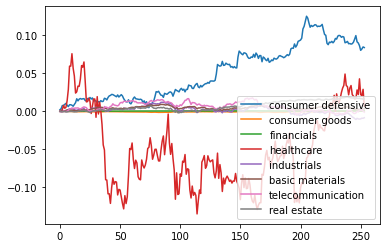

In [81]:
maxsharpe_ret=post_sectors_df*pw_maxsharpe_norm
maxsharpe_ret.loc[:, (maxsharpe_ret != 0).any(axis=0)].cumsum().plot()

In [83]:
maxret_ret=post_sectors_df*pw_maxret_norm
minvol_ret=post_sectors_df*pw_minvol_norm
henro=[]
henry=[]
henrie=[]
for x in range(len(maxsharpe_ret)):
  henro.append(maxsharpe_ret.cumsum(axis=0).loc[x].sum())
henro_df=pd.DataFrame(henro)
for x in range(len(maxret_ret)):
  henry.append(maxret_ret.cumsum(axis=0).loc[x].sum())
henry_df=pd.DataFrame(henry)
for x in range(len(minvol_ret)):
  henrie.append(minvol_ret.cumsum(axis=0).loc[x].sum())
henrie_df=pd.DataFrame(henrie)

<AxesSubplot:>

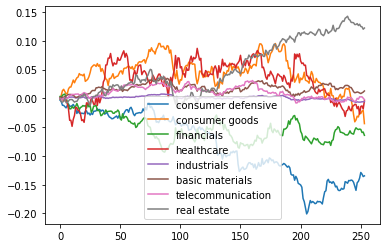

In [84]:
minvol_ret.loc[:, (minvol_ret != 0).any(axis=0)].cumsum().plot()

<AxesSubplot:>

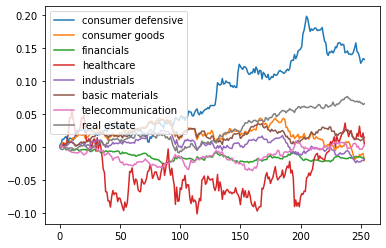

In [85]:
maxret_ret.loc[:, (maxret_ret != 0).any(axis=0)].cumsum().plot()

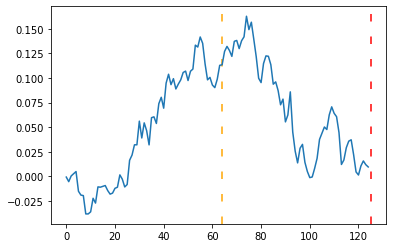

In [59]:
fig=plt.figure()
plt.axvline(x=64,linestyle=(0, (5,10)),color='orange')
plt.axvline(x=125,linestyle=(0, (5,10)),color='red')
plt.plot(henrie_df)

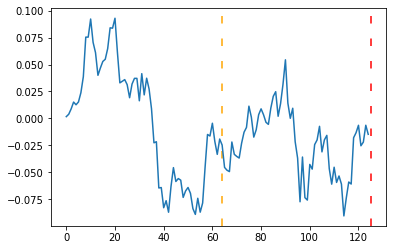

In [60]:
fig=plt.figure()
plt.axvline(x=64,linestyle=(0, (5,10)),color='orange')
plt.axvline(x=125,linestyle=(0, (5,10)),color='red')
plt.plot(henro_df)

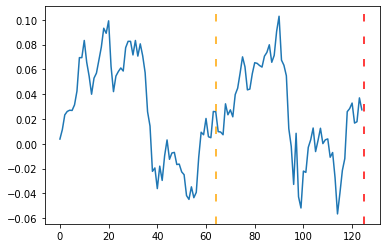

In [61]:
fig=plt.figure()
plt.axvline(x=64,linestyle=(0, (5,10)),color='orange')
plt.axvline(x=125,linestyle=(0, (5,10)),color='red')
plt.plot(henry_df)

In [62]:
henry_df[230:]

,0


<AxesSubplot:xlabel='Date'>

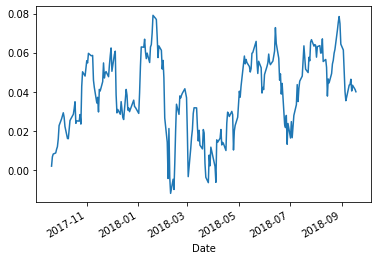

In [63]:
data2.cumsum().plot()